# SAMPLE BUSINESS PROCESS ANALYSIS
>*2 versions in Vietnamese and English are available* 
>*This project is for practice analysis skill.*
> The file [dashboard](dashboard.pbix) is for visualizing data of this dataset by using PowerBI.

This project will guide you in exploratory analysis of the sample bussiness process. We will learn about 2 key stages of data analysis: data wrangling and data analysis. And from the analysis of available data, we come up with some hypothetical options for the company. 

## Description
- This dataset is found from kaggle website.
## Data Wrangling And EDA
Now it's time to explore the data.

When dealing with a large amount of data, it can be useful to begin by working with a sample of the data. This makes it easier to verify that our data wrangling steps are functioning properly, as our code will take less time to execute. Once we are confident in our approach, we can then scale up to work on the entire dataset.

To begin your analysis, start by running the first code cell to load all necessary packages and functions. Afterward, execute the second code cell to read a subset of the first trip data file. This will create a new file that contains only the subset of data that we are initially interested in.

* Now import some neccessary library

In [1]:
import pandas as pd
import statistics as stat
import datetime
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read data from excel file
sample_data = pd.read_excel('sample.xls')

In [3]:
pd.set_option('display.max_columns', None)
sample_data.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
sample_data.tail(5)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,2017-05-04,2017-05-09,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,California,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [5]:
sample_data.shape

(9994, 21)

In [6]:
sample_data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [7]:
sample_data.isnull().any()

Row ID           False
Order ID         False
Order Date       False
Ship Date        False
Ship Mode        False
Customer ID      False
Customer Name    False
Segment          False
Country          False
City             False
State            False
Postal Code      False
Region           False
Product ID       False
Category         False
Sub-Category     False
Product Name     False
Sales            False
Quantity         False
Discount         False
Profit           False
dtype: bool

In [8]:
sample_data.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

* Sub-conclusions:
    - This dataset has 9994 rows and 21 columns.
    - It's so great that there is no missing values in this dataset. we can trust the reliability of the dataset.
    - We have 6 column due to numeric value to deal with. It's very important column to get more knowlegde about analysis.

In [9]:
for column in sample_data.columns:
    print("{}: Unique: {}, list: {}".format(str(column),len(sample_data[column].unique().tolist()),sample_data[column].unique().tolist()))


Row ID: Unique: 9994, list: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,

In [10]:
print("Unique Product name: {}".format(len(sample_data['Product Name'].unique().tolist())))
print("All product count: {}".format( sample_data.shape[0]))

Unique Product name: 1850
All product count: 9994


To easier to deal with this dataset, we should remove some columns which is not important for data analysis

In [11]:
sample_data_copy = sample_data.drop(columns=["Row ID",'Order ID',"Customer ID",'Product ID',"Postal Code","City","Country"])
sample_data_copy.shape

(9994, 14)

In [12]:
sample_data_copy.head() 

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [13]:
sample_data_copy.describe()

,Order Date,Ship Date,Sales,Quantity,Discount,Profit
count,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
mean,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,229.858001,3.789574,0.156203,28.656896
min,2014-01-03 00:00:00,2014-01-07 00:00:00,0.444000,1.000000,0.000000,-6599.978000
25%,2015-05-23 00:00:00,2015-05-27 00:00:00,17.280000,2.000000,0.000000,1.728750
50%,2016-06-26 00:00:00,2016-06-29 00:00:00,54.490000,3.000000,0.200000,8.666500
75%,2017-05-14 00:00:00,2017-05-18 00:00:00,209.940000,5.000000,0.200000,29.364000
max,2017-12-30 00:00:00,2018-01-05 00:00:00,22638.480000,14.000000,0.800000,8399.976000
std,NaN,NaN,623.245101,2.225110,0.206452,234.260108


We don't need to care about order date and ship date in this describe
- We have total 9994 orders.
- Average sales is about 229,858001
- Median of sale is 54.49 
- 75% sales is 209.94 which means we have 25% orders is greater than 209.94, but it's still less than the average of sales. 
  => So less than 25% of the top is the most important customer for our bussiness.
  


In [14]:
stat.multimode(sample_data['Sales'])

[12.96]

In [15]:
year, sales = stat.linear_regression(sample_data_copy["Order Date"].dt.year,sample_data['Sales']) # sales_forcast = year * year_input + sales
year1, profit = stat.linear_regression(sample_data_copy["Order Date"].dt.year,sample_data['Profit']) # sales_forcast = year * year_input + sales

In [16]:
sales_by_year = {"Year" :[], "Sales" : []}
profit_by_year ={"Year" :[], "Profit" : []}
for year_input in range(2014,2020): # 2014 -> 2019 
    sales_by_year["Year"].append( year_input)
    sales_by_year['Sales'].append( round(year * year_input + sales,2))
    profit_by_year["Year"].append(year_input)
    profit_by_year["Profit"].append(round(year1 * year_input + profit,2))
sales_by_year = pd.DataFrame.from_dict(sales_by_year)
sales_by_year.head()


,Year,Sales
0,2014,239.10
1,2015,233.74
2,2016,228.37
3,2017,223.00
4,2018,217.63


In [17]:
profit_by_year = pd.DataFrame.from_dict(profit_by_year)
profit_by_year.head()

,Year,Profit
0,2014,26.98
1,2015,27.95
2,2016,28.93
3,2017,29.90
4,2018,30.87


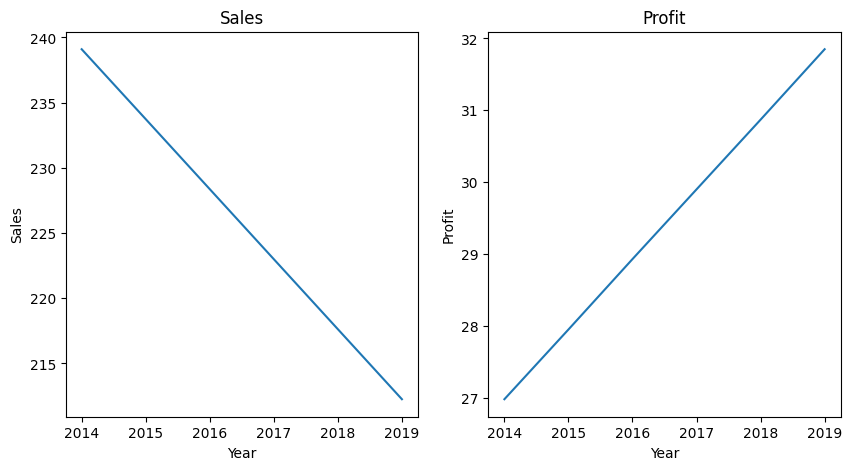

In [18]:
fig, ax = plt.subplots(1,2,figsize= (10 ,5 )) 
sns.lineplot(data = sales_by_year, x = "Year", y = "Sales" ,ax = ax[0]).set_title("Sales")
sns.lineplot(data = profit_by_year, x = "Year", y = "Profit" ,ax = ax[1]).set_title("Profit")
plt.show()

By using linear progression, we can see our business is seem to go down by year. To get deep into it, let try to analyze more.
## **Category**
> To get easier to create pieplot by columnn name, I create a piePlot function to help this below 

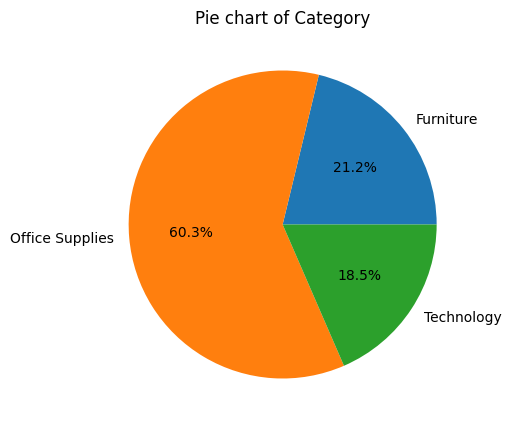

In [19]:
def piePlot(column_name, figsize = (5,5)):
    dict = {}
    for column in sample_data_copy[column_name].unique():
        dict[column] = sample_data_copy[column_name].where(sample_data_copy[column_name] == column).count()
    fig, ax = plt.subplots(figsize = figsize)
    plt.pie(list(dict.values()),labels= list(dict.keys()),autopct='%1.1f%%')
    ax.set_title("Pie chart of {}".format(column_name))
    plt.show()
piePlot("Category")



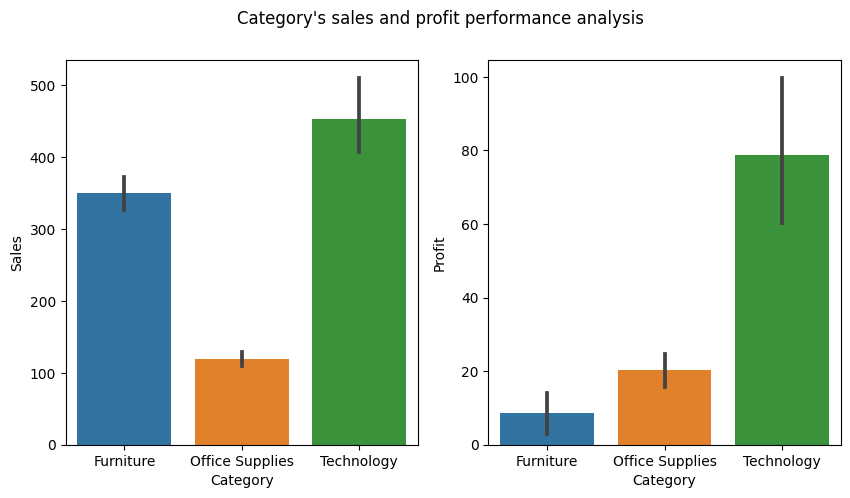

In [20]:
fig, ax = plt.subplots(1,2,figsize=(10, 5))
fig.suptitle("Category's sales and profit performance analysis")
sns.barplot(sample_data,x = 'Category', y = 'Sales',ax = ax[0])
sns.barplot(sample_data,x = 'Category', y = 'Profit',ax = ax[1])
plt.show()

- There is not much different about 'Office supplies' and "Technology". But we can see different of Furniture is very high.

In [21]:
sample_data_copy['Sub-Category'].where(sample_data_copy['Category'] == 'Furniture').unique().tolist()

['Bookcases', 'Chairs', nan, 'Tables', 'Furnishings']

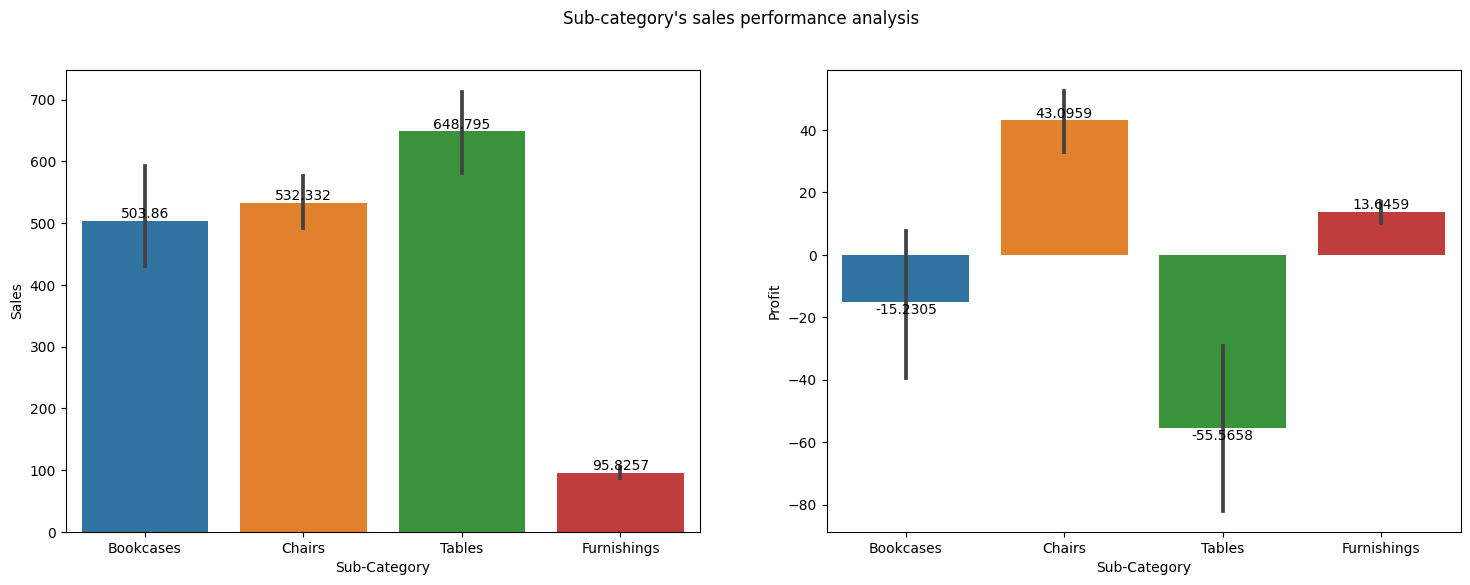

In [22]:

fig, ax = plt.subplots(1,2,figsize=(18, 6))
fig.suptitle("Sub-category's sales performance analysis")
sns.barplot(sample_data.where(sample_data_copy['Category'] == 'Furniture'),x = 'Sub-Category', y = 'Sales', ax=ax[0])
sns.barplot(sample_data.where(sample_data_copy['Category'] == 'Furniture'),x = 'Sub-Category', y = 'Profit', ax=ax[1])
for label1 in ax[0].containers:
    ax[0].bar_label(label1)
for label1 in ax[1].containers:
    ax[1].bar_label(label1)
plt.show()

**Now we know *Bookcases* and *Tables* make profit negative. We will learn about this more later.**

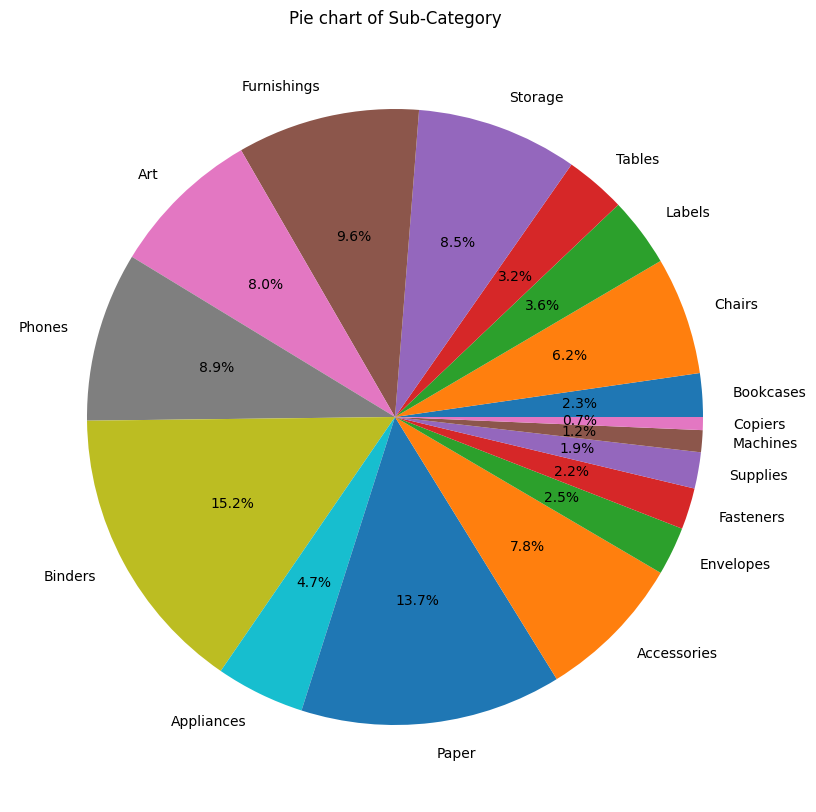

In [23]:
piePlot("Sub-Category",figsize=(10,10))

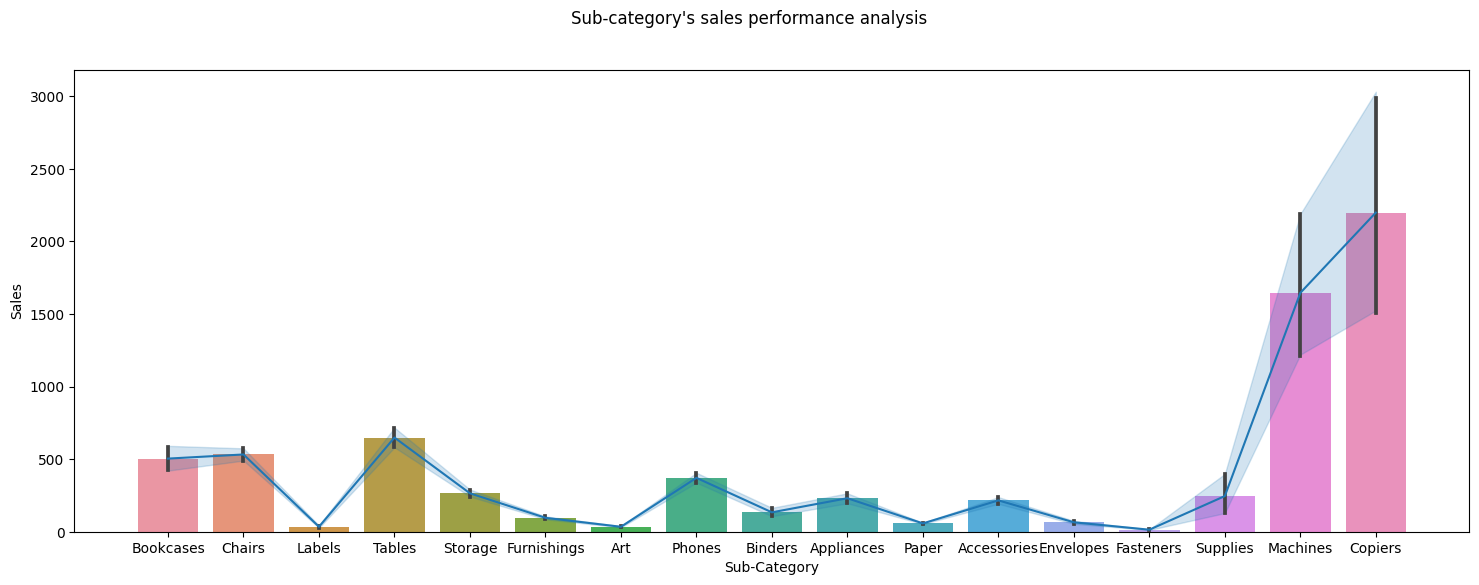

In [24]:
fig, ax = plt.subplots(figsize=(18, 6))
fig.suptitle("Sub-category's sales performance analysis")
sns.barplot(sample_data,x = 'Sub-Category', y = 'Sales', ax=ax)
sns.lineplot(sample_data,x = 'Sub-Category', y = 'Sales', ax=ax)
plt.show()

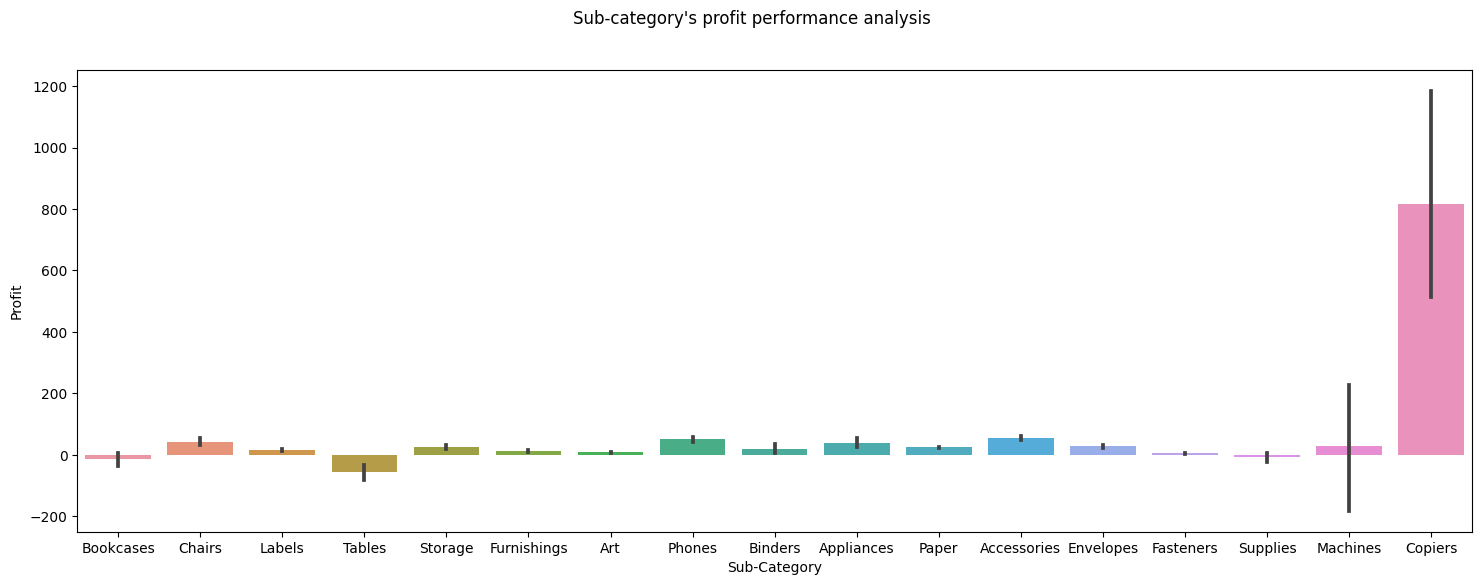

In [25]:
fig, ax = plt.subplots(figsize=(18, 6))
fig.suptitle("Sub-category's profit performance analysis")
sns.barplot(sample_data,y = 'Profit',x = 'Sub-Category', ax=ax)
plt.show()

## **Segment**

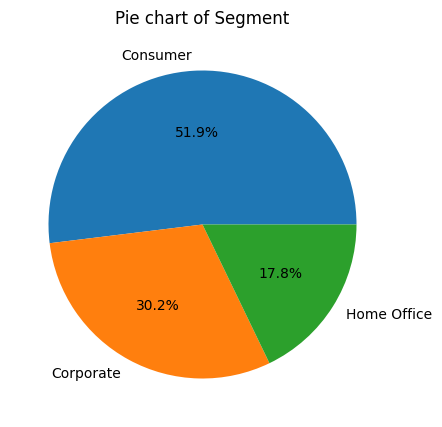

In [26]:
piePlot('Segment')

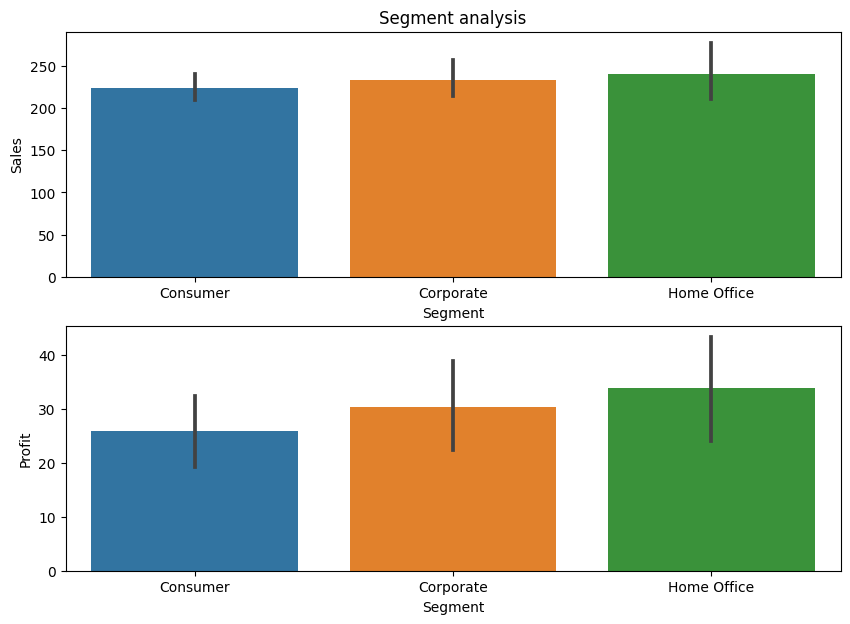

In [27]:
fig, ax = plt.subplots(2,1,figsize = (10,7))
sns.barplot(sample_data_copy,x = 'Segment',y= 'Sales', ax= ax[0]).set_title('Segment analysis')
sns.barplot(sample_data_copy,x = 'Segment',y= 'Profit', ax= ax[1])
plt.show()

## **Ship Mode**

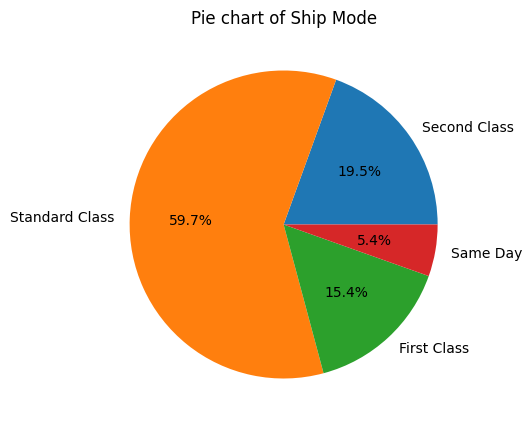

In [28]:
piePlot("Ship Mode")

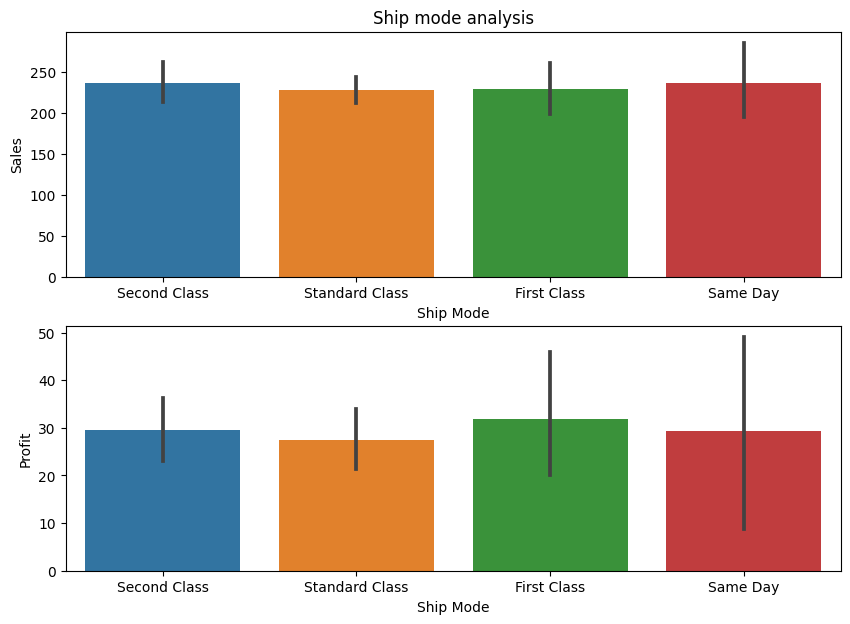

In [29]:
fig, ax = plt.subplots(2,1,figsize = (10,7))
sns.barplot(sample_data_copy ,x = 'Ship Mode',y= 'Sales',ax = ax[0]).set_title('Ship mode analysis')
sns.barplot(sample_data_copy ,x = 'Ship Mode',y= 'Profit',ax = ax[1])
plt.show()

## **Region**

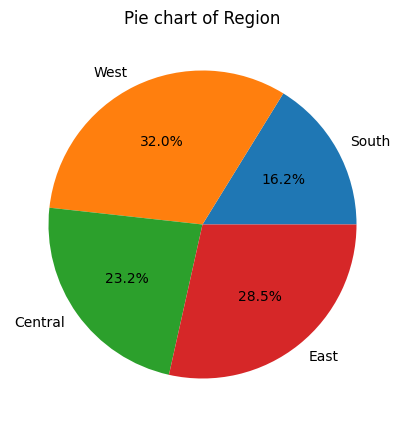

In [30]:
piePlot("Region")

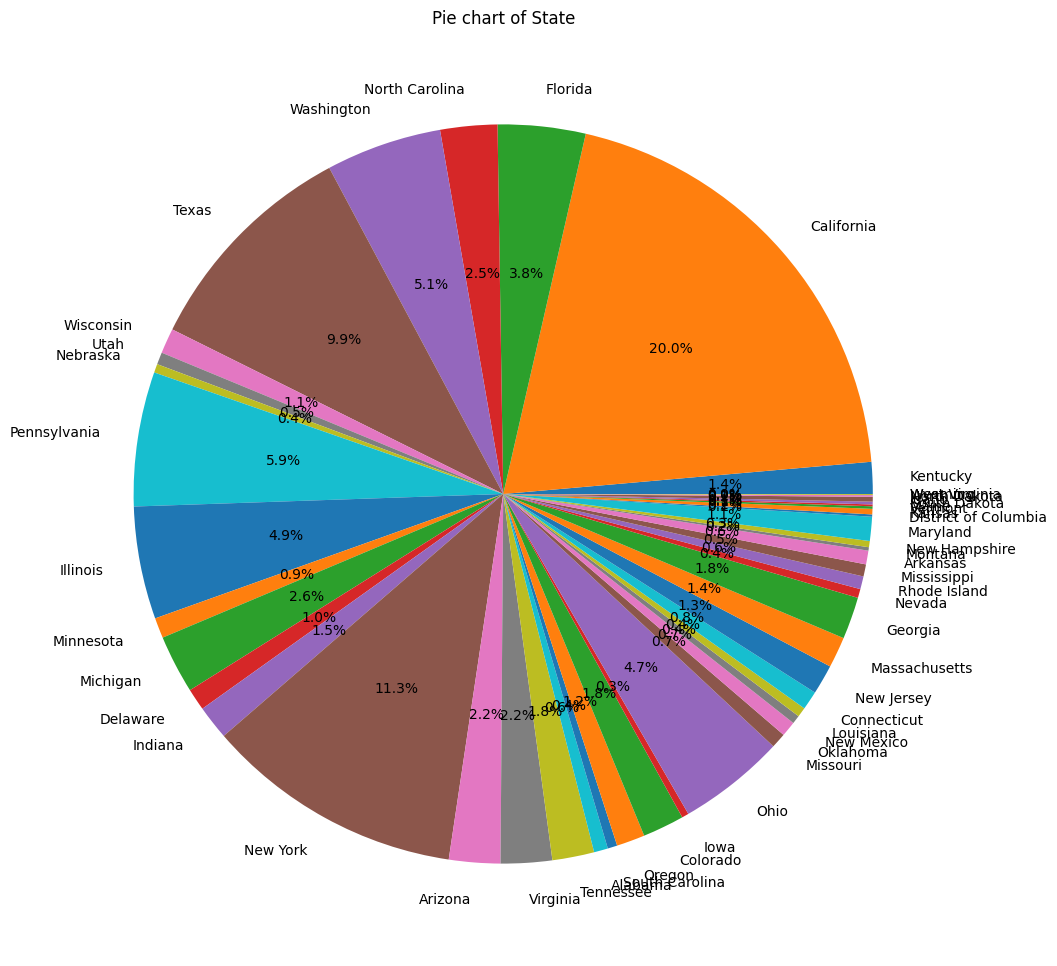

In [31]:
piePlot(column_name="State",figsize = (12,12))

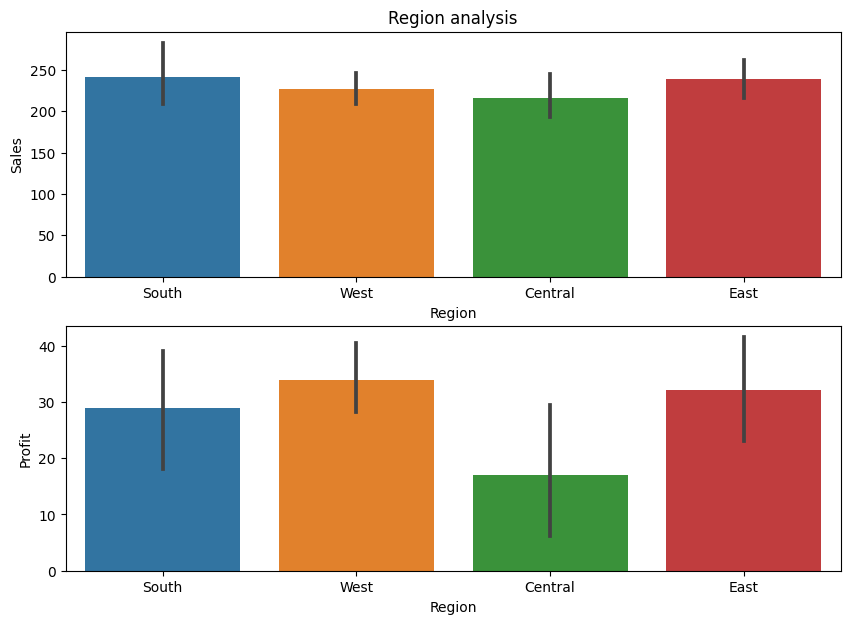

In [32]:
fig, ax = plt.subplots(2,1,figsize = (10,7))
sns.barplot(sample_data_copy ,x = 'Region',y= 'Sales', ax = ax[0]).set_title('Region analysis')
sns.barplot(sample_data_copy ,x = 'Region',y= 'Profit', ax = ax[1])
plt.show()

- Element such as: Segment, Shipmode, Region are hardly related to the business process.

## **Shipping**

In [33]:
sample_data_copy["Ship Time"] = sample_data_copy["Ship Date"] - sample_data_copy['Order Date']
sample_data_copy.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Ship Time
0,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3 days
1,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3 days
2,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4 days
3,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7 days
4,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7 days


In [34]:
sample_data_copy['Ship Time'].describe()

count                         9994
mean     3 days 22:59:46.311787072
std      1 days 17:56:29.766161104
min                0 days 00:00:00
25%                3 days 00:00:00
50%                4 days 00:00:00
75%                5 days 00:00:00
max                7 days 00:00:00
Name: Ship Time, dtype: object

- We can see here, the longest time for shipping is 7 days
- Min is 0 day that mean all the orders are shipped successful
- Average shipping time is nearly 4 days.


In [35]:
sample_data_copy['Ship Time'].unique()

<TimedeltaArray>
['3 days', '4 days', '7 days', '5 days', '2 days', '6 days', '1 days',
 '0 days']
Length: 8, dtype: timedelta64[ns]

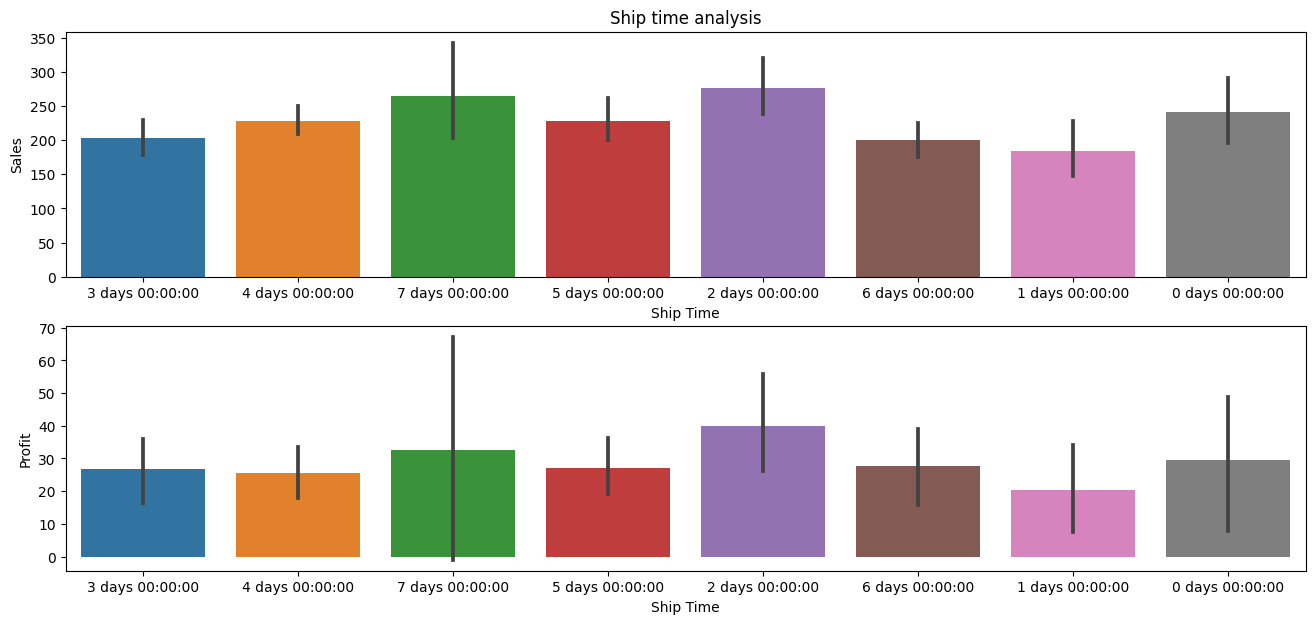

In [36]:
fig, ax = plt.subplots(2,1,figsize=(16, 7))
sns.barplot(sample_data_copy ,x = 'Ship Time',y= 'Sales',ax = ax[0]).set_title('Ship time analysis')
sns.barplot(sample_data_copy ,x = 'Ship Time',y= 'Profit',ax = ax[1])
plt.show()

What is the stuff take longest time to ship?

In [37]:
sample_data_copy['Ship Time'] = sample_data_copy['Ship Time'].dt.days

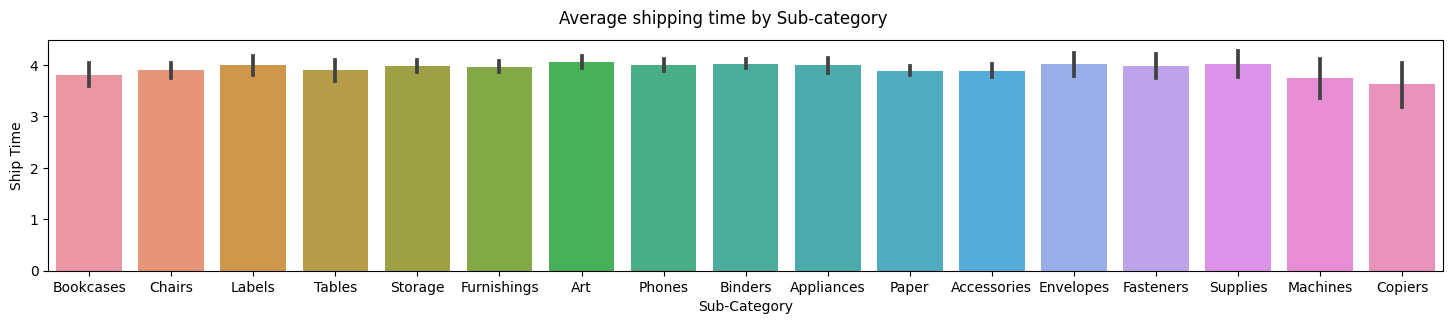

In [38]:
fig, ax = plt.subplots(figsize=(18, 3))
fig.suptitle('Average shipping time by Sub-category')
sns.barplot(data= sample_data_copy, y = 'Ship Time', x = "Sub-Category")
plt.show()

## **Discount**

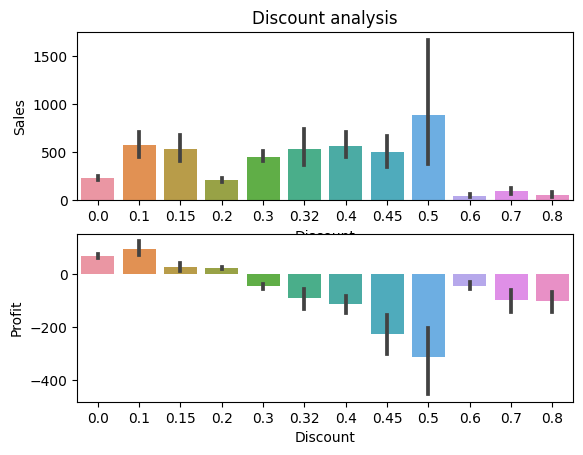

In [39]:
fig, ax = plt.subplots(2,1)
sns.barplot(sample_data_copy ,x = 'Discount',y= 'Sales', ax = ax[0]).set_title('Discount analysis')
sns.barplot(sample_data_copy ,x = 'Discount',y= 'Profit',ax = ax[1])
plt.show()

Here, we can see that the amount of discount greatly affects profits.
- Discount from 0.3 to 0.8 made profit negative. 
- If we want to get profit, we should consider about discount under 0.3

In [40]:
sample_data_copy['Profit'].describe()

count    9994.000000
mean       28.656896
std       234.260108
min     -6599.978000
25%         1.728750
50%         8.666500
75%        29.364000
max      8399.976000
Name: Profit, dtype: float64

- average of profit is about 28.65$.
- there is 25% orders make more than 29.364$ profit.

In [41]:
sample_data_copy['Year'] = pd.DatetimeIndex(sample_data_copy['Order Date']).year
sample_data_copy['Month'] = pd.DatetimeIndex(sample_data_copy['Order Date']).month
sample_data_copy.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Ship Time,Year,Month
0,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3,2016,11
1,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3,2016,11
2,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4,2016,6
3,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7,2015,10
4,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7,2015,10


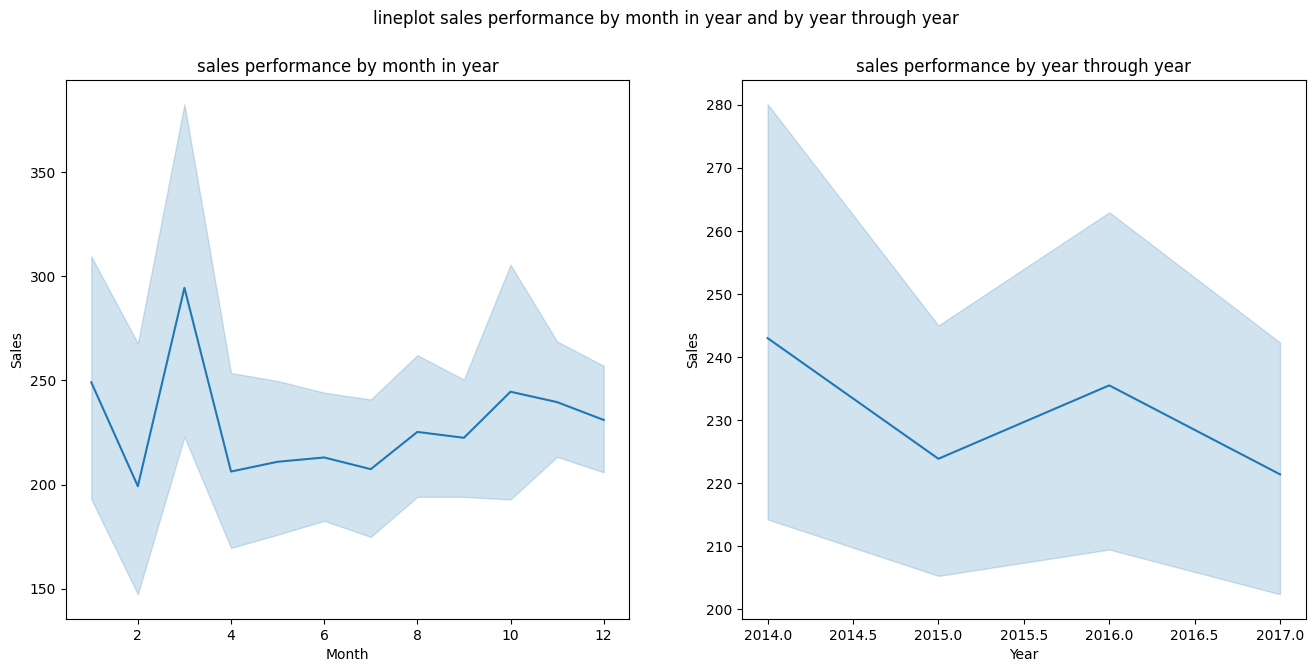

In [42]:
fig, axes = plt.subplots(1,2, figsize = (16,7))
fig.suptitle('lineplot sales performance by month in year and by year through year')
axes[0].set_title('sales performance by month in year')
axes[1].set_title('sales performance by year through year')
sns.lineplot(data=sample_data_copy, x= "Month", y = "Sales",ax=axes[0])
sns.lineplot(data=sample_data_copy, x= "Year", y = "Sales",ax=axes[1])
plt.show()

As we can see in the right plot, Sales are trending downward year by year.

In the left plot, performance of Sales is highest in March. 
- Trending going up at the end of Spring and the begin of Winter.
- Sales performance is downward in the of Winter.

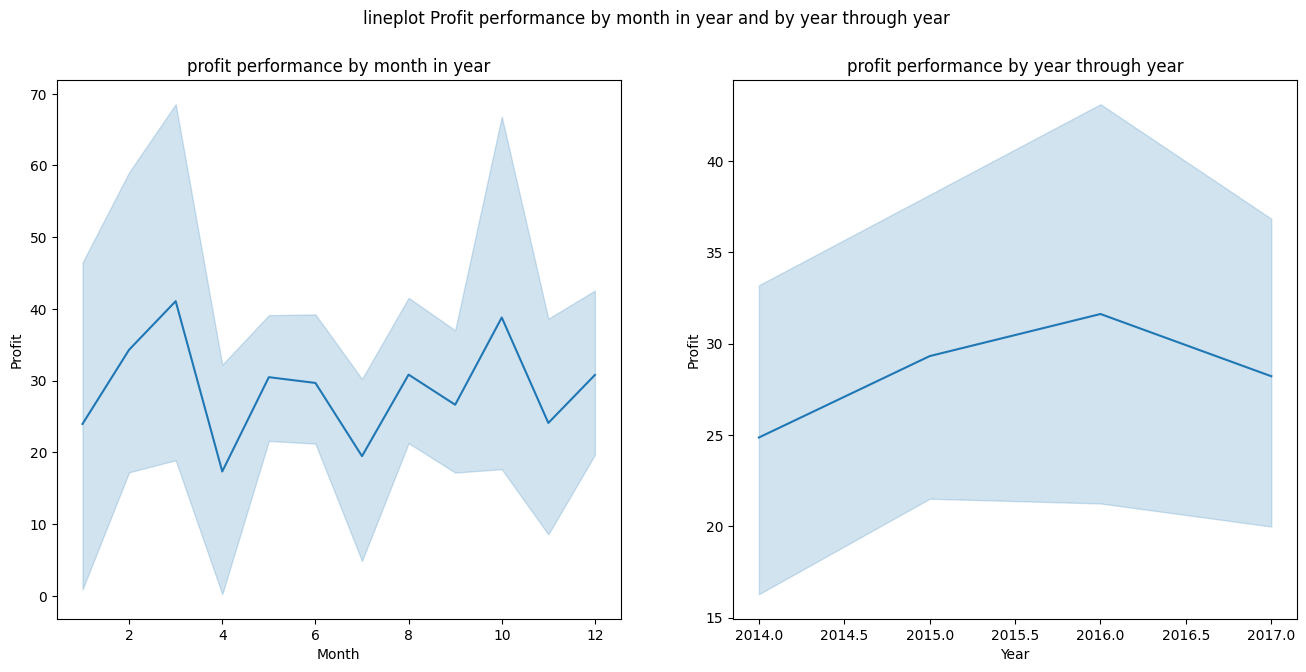

In [43]:
fig, axes = plt.subplots(1,2, figsize = (16,7))
fig.suptitle('lineplot Profit performance by month in year and by year through year')
axes[0].set_title('profit performance by month in year')
axes[1].set_title('profit performance by year through year')
sns.lineplot(data=sample_data_copy, x= "Month", y = "Profit",ax=axes[0])
sns.lineplot(data=sample_data_copy, x= "Year", y = "Profit",ax=axes[1])
plt.show()

As we can see in the right plot, Profit are trending going up 2014 - 2016, downward from 2016 - 2017
Sales and Profit performance by month in year and by year is not similar.

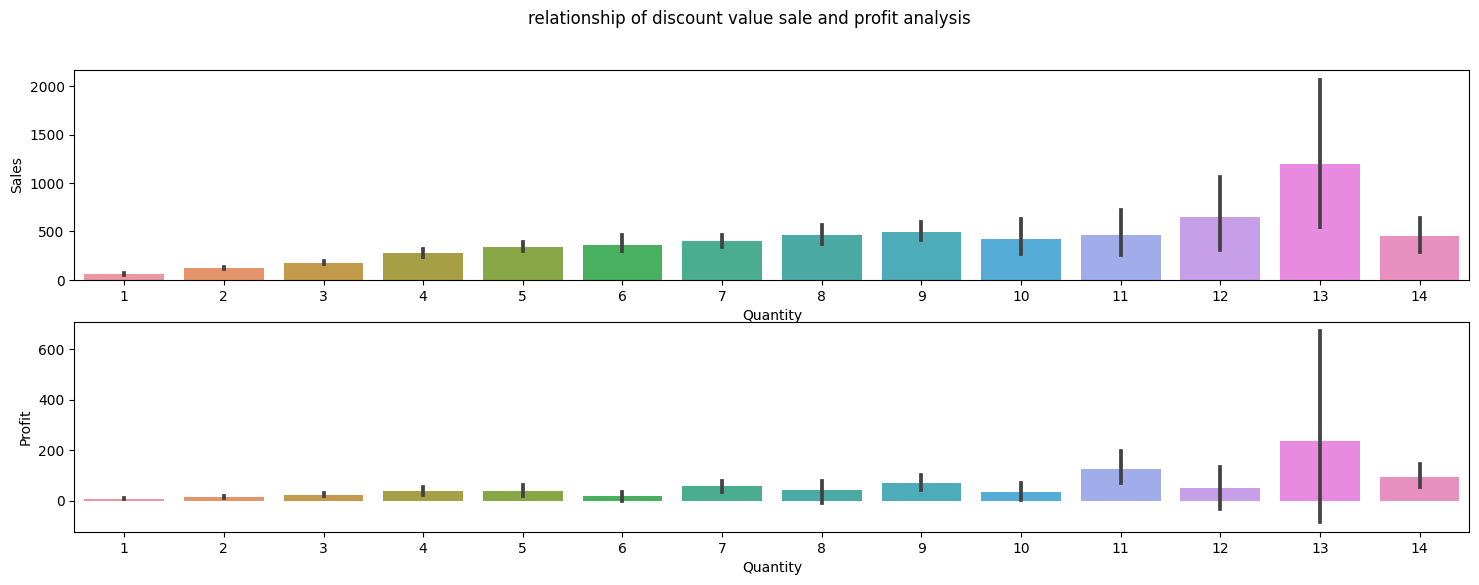

In [44]:
fig, ax = plt.subplots(2,1,figsize = (18,6))
fig.suptitle('relationship of discount value sale and profit analysis')
sns.barplot(sample_data_copy ,x = 'Quantity',y= 'Sales', ax = ax[0])
sns.barplot(sample_data_copy ,x = 'Quantity',y= 'Profit',ax = ax[1])

plt.show()

In [45]:
sample_data_copy_sort_by_sales = sample_data_copy.sort_values('Sales',ascending = False).head(10)
sample_data_copy_sort_by_sales.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Ship Time,Year,Month
2697,2014-03-18,2014-03-23,Standard Class,Sean Miller,Home Office,Florida,South,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480,6,0.5,-1811.0784,5,2014,3
6826,2016-10-02,2016-10-09,Standard Class,Tamara Chand,Corporate,Indiana,Central,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950,5,0.0,8399.9760,7,2016,10
8153,2017-03-23,2017-03-25,First Class,Raymond Buch,Consumer,Washington,West,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,4,0.0,6719.9808,2,2017,3
2623,2017-10-22,2017-10-24,First Class,Tom Ashbrook,Home Office,New York,East,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,4,0.2,3919.9888,2,2017,10
4190,2017-11-17,2017-11-22,Standard Class,Hunter Lopez,Consumer,Delaware,East,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,3,0.0,5039.9856,5,2017,11


In [46]:
sample_data_copy_sort_by_profit = sample_data_copy.sort_values('Profit',ascending = False).head(10)
sample_data_copy_sort_by_profit.head(10)

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Ship Time,Year,Month
6826,2016-10-02,2016-10-09,Standard Class,Tamara Chand,Corporate,Indiana,Central,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950,5,0.0,8399.9760,7,2016,10
8153,2017-03-23,2017-03-25,First Class,Raymond Buch,Consumer,Washington,West,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,4,0.0,6719.9808,2,2017,3
4190,2017-11-17,2017-11-22,Standard Class,Hunter Lopez,Consumer,Delaware,East,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,3,0.0,5039.9856,5,2017,11
9039,2016-12-17,2016-12-21,Standard Class,Adrian Barton,Consumer,Michigan,Central,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,9892.740,13,0.0,4946.3700,4,2016,12
4098,2014-09-23,2014-09-28,Standard Class,Sanjit Chand,Consumer,Minnesota,Central,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,9449.950,5,0.0,4630.4755,5,2014,9
2623,2017-10-22,2017-10-24,First Class,Tom Ashbrook,Home Office,New York,East,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,4,0.2,3919.9888,2,2017,10
509,2015-03-16,2015-03-22,Standard Class,Christopher Martinez,Consumer,Georgia,South,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,6354.950,5,0.0,3177.4750,6,2015,3
8488,2016-02-02,2016-02-04,Second Class,Sanjit Engle,Consumer,Virginia,South,Technology,Machines,HP Designjet T520 Inkjet Large Format Printer ...,8749.950,5,0.0,2799.9840,2,2016,2
7666,2016-10-04,2016-10-08,Standard Class,Daniel Raglin,Home Office,Rhode Island,East,Technology,Copiers,Hewlett Packard LaserJet 3310 Copier,5399.910,9,0.0,2591.9568,4,2016,10
6520,2017-01-16,2017-01-18,Second Class,Andy Reiter,Consumer,Michigan,Central,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,5443.960,4,0.0,2504.2216,2,2017,1


In [47]:
x = {}
for column in sample_data_copy_sort_by_profit.columns:
    if column not in ['Order Date', 'Ship Date','Sales','Profit']:
        x[column] = []
        x[column] = sample_data_copy_sort_by_sales[column].unique().tolist() 
pd.DataFrame.from_dict(x,'index').transpose().head(10)

,Ship Mode,Customer Name,Segment,State,Region,Category,Sub-Category,Product Name,Quantity,Discount,Ship Time,Year,Month
0,Standard Class,Sean Miller,Home Office,Florida,South,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,6,0.5,5,2014,3
1,First Class,Tamara Chand,Corporate,Indiana,Central,Office Supplies,Copiers,Canon imageCLASS 2200 Advanced Copier,5,0.0,7,2016,10
2,Second Class,Raymond Buch,Consumer,Washington,West,None,Binders,GBC Ibimaster 500 Manual ProClick Binding System,4,0.2,2,2017,11
3,None,Tom Ashbrook,None,New York,East,None,None,Ibico EPK-21 Electric Binding System,3,0.4,4,None,12
4,None,Hunter Lopez,None,Delaware,None,None,None,"3D Systems Cube Printer, 2nd Generation, Magenta",13,None,None,None,9
5,None,Adrian Barton,None,Michigan,None,None,None,HP Designjet T520 Inkjet Large Format Printer ...,7,None,None,None,4
6,None,Sanjit Chand,None,Minnesota,None,None,None,None,None,None,None,None,2
7,None,Bill Shonely,None,New Jersey,None,None,None,None,None,None,None,None,5
8,None,Sanjit Engle,None,Virginia,None,None,None,None,None,None,None,None,None
9,None,Christopher Conant,None,Pennsylvania,None,None,None,None,None,None,None,None,None


In [48]:
x = {}
for column in sample_data_copy_sort_by_profit.columns:
    if column not in ['Order Date', 'Ship Date']:
        x[column] = []
        x[column] = sample_data_copy_sort_by_profit[column].unique().tolist() 
pd.DataFrame.from_dict(x,'index').transpose().head(10)


,Ship Mode,Customer Name,Segment,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Ship Time,Year,Month
0,Standard Class,Tamara Chand,Corporate,Indiana,Central,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.95,5,0.0,8399.976,7,2016,10
1,First Class,Raymond Buch,Consumer,Washington,West,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,13999.96,4,0.2,6719.9808,2,2017,3
2,Second Class,Hunter Lopez,Home Office,Delaware,East,None,Machines,Ibico EPK-21 Electric Binding System,10499.97,3,None,5039.9856,5,2014,11
3,None,Adrian Barton,None,Michigan,South,None,None,Fellowes PB500 Electric Punch Plastic Comb Bin...,9892.74,13,None,4946.37,4,2015,12
4,None,Sanjit Chand,None,Minnesota,None,None,None,HP Designjet T520 Inkjet Large Format Printer ...,9449.95,9,None,4630.4755,6,None,9
5,None,Tom Ashbrook,None,New York,None,None,None,Hewlett Packard LaserJet 3310 Copier,11199.968,None,None,3919.9888,None,None,2
6,None,Christopher Martinez,None,Georgia,None,None,None,GBC DocuBind P400 Electric Binding System,6354.95,None,None,3177.475,None,None,1
7,None,Sanjit Engle,None,Virginia,None,None,None,None,8749.95,None,None,2799.984,None,None,None
8,None,Daniel Raglin,None,Rhode Island,None,None,None,None,5399.91,None,None,2591.9568,None,None,None
9,None,Andy Reiter,None,None,None,None,None,None,5443.96,None,None,2504.2216,None,None,None


## What happened with Boookcases and Tables?

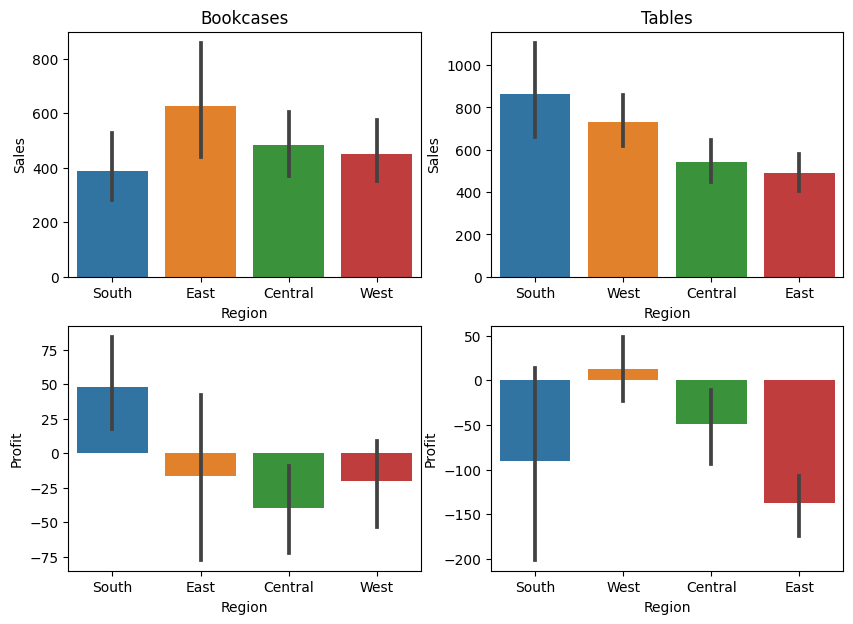

In [49]:
fig, ax = plt.subplots(2,2,figsize = (10,7))
sns.barplot(sample_data_copy.where(sample_data_copy['Sub-Category'] == 'Bookcases') ,x = 'Region',y= 'Sales', ax = ax[0][0]).set_title("Bookcases")
sns.barplot(sample_data_copy.where(sample_data_copy['Sub-Category'] == 'Bookcases') ,x = 'Region',y= 'Profit', ax = ax[1][0])
sns.barplot(sample_data_copy.where(sample_data_copy['Sub-Category'] == 'Tables' ),x = 'Region',y= 'Sales', ax = ax[0][1]).set_title("Tables")
sns.barplot(sample_data_copy.where(sample_data_copy['Sub-Category'] == 'Tables' ),x = 'Region',y= 'Profit', ax = ax[1][1])
plt.show()

- About Bookcases, Sales performance high in East, Central, West but Profit is negative
- About Tabes, Sales performance high in South, Central, East but Profit is negative

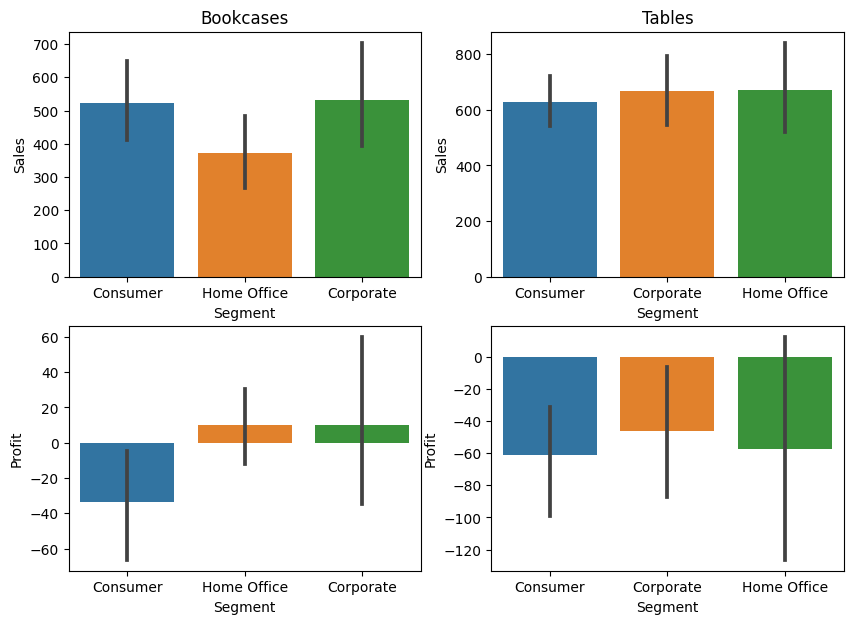

In [50]:
fig, ax = plt.subplots(2,2,figsize = (10,7))
x = 'Segment'
sns.barplot(sample_data_copy.where(sample_data_copy['Sub-Category'] == 'Bookcases') ,x = x,y= 'Sales', ax = ax[0][0]).set_title("Bookcases")
sns.barplot(sample_data_copy.where(sample_data_copy['Sub-Category'] == 'Bookcases') ,x = x,y= 'Profit', ax = ax[1][0])
sns.barplot(sample_data_copy.where(sample_data_copy['Sub-Category'] == 'Tables' ),   x = x,y= 'Sales', ax = ax[0][1]).set_title("Tables")
sns.barplot(sample_data_copy.where(sample_data_copy['Sub-Category'] == 'Tables' ),   x = x,y= 'Profit', ax = ax[1][1])
plt.show()

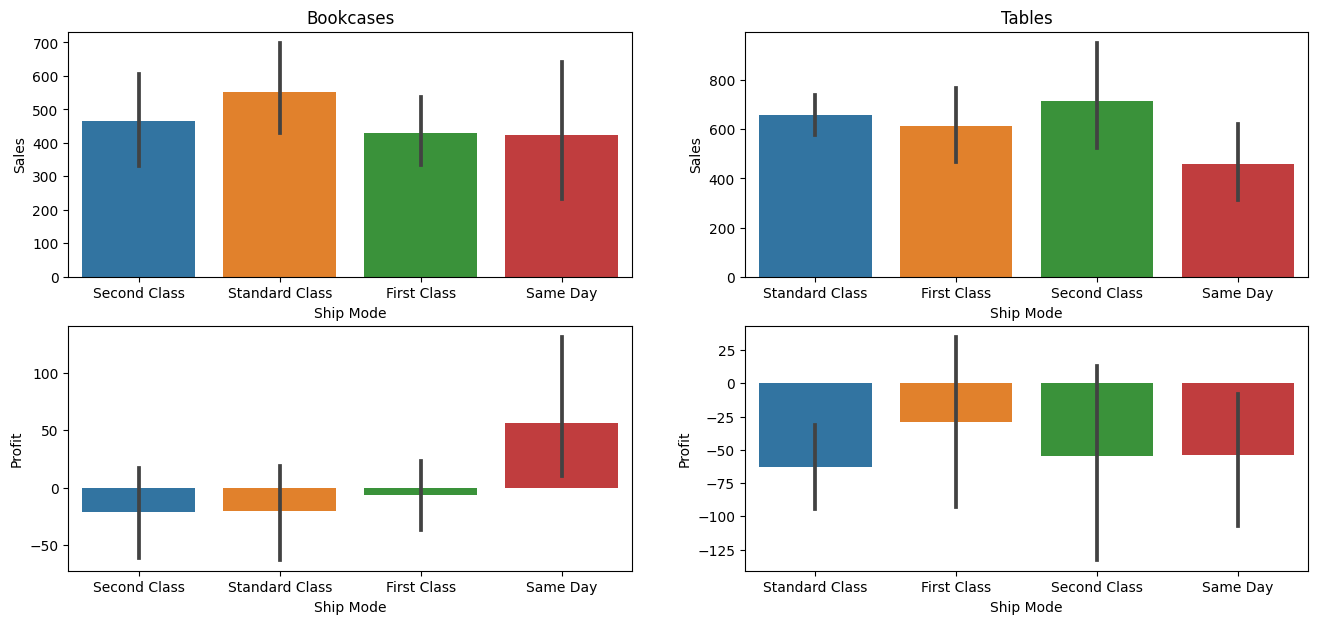

In [51]:
fig, ax = plt.subplots(2,2,figsize = (16,7))
x = 'Ship Mode'
sns.barplot(sample_data_copy.where(sample_data_copy['Sub-Category'] == 'Bookcases') ,x = x,y= 'Sales', ax = ax[0][0]).set_title("Bookcases")
sns.barplot(sample_data_copy.where(sample_data_copy['Sub-Category'] == 'Bookcases') ,x = x,y= 'Profit', ax = ax[1][0])
sns.barplot(sample_data_copy.where(sample_data_copy['Sub-Category'] == 'Tables' ),   x = x,y= 'Sales', ax = ax[0][1]).set_title("Tables")
sns.barplot(sample_data_copy.where(sample_data_copy['Sub-Category'] == 'Tables' ),   x = x,y= 'Profit', ax = ax[1][1])
plt.show()

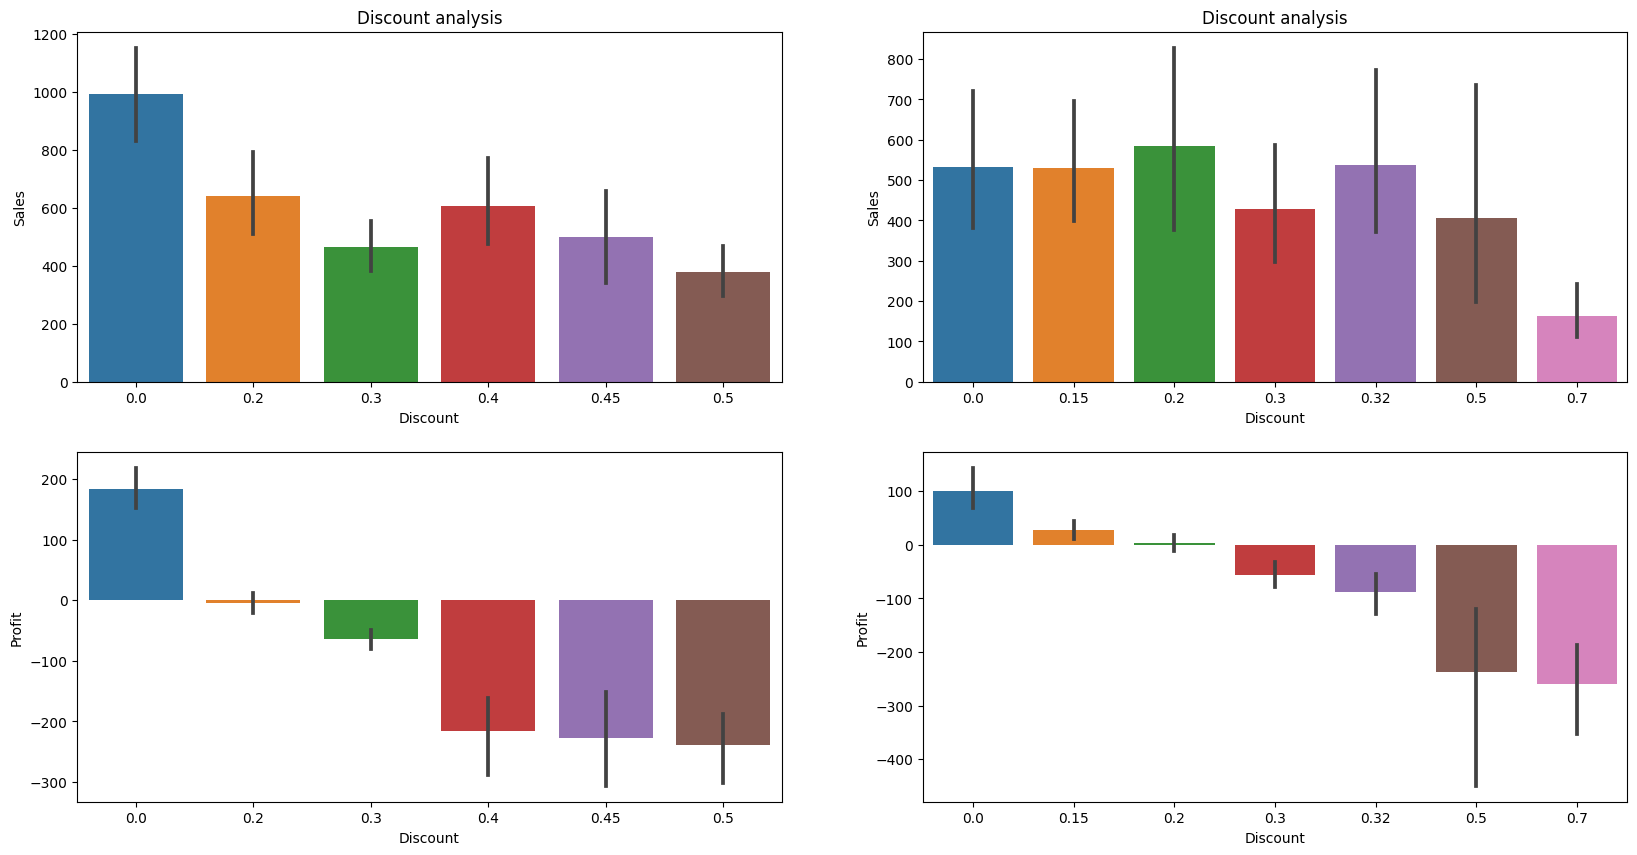

In [52]:
fig, ax = plt.subplots(2,2,figsize = (20,10))
sns.barplot(sample_data_copy.where(sample_data_copy['Sub-Category'] == 'Tables') ,x = 'Discount',y= 'Sales', ax = ax[0][0]).set_title('Discount analysis')
sns.barplot(sample_data_copy.where(sample_data_copy['Sub-Category'] == 'Tables') ,x = 'Discount',y= 'Profit',ax = ax[1][0])
sns.barplot(sample_data_copy.where(sample_data_copy['Sub-Category'] == 'Bookcases') ,x = 'Discount',y= 'Sales', ax = ax[0][1]).set_title('Discount analysis')
sns.barplot(sample_data_copy.where(sample_data_copy['Sub-Category'] == 'Bookcases') ,x = 'Discount',y= 'Profit',ax = ax[1][1])
plt.show()

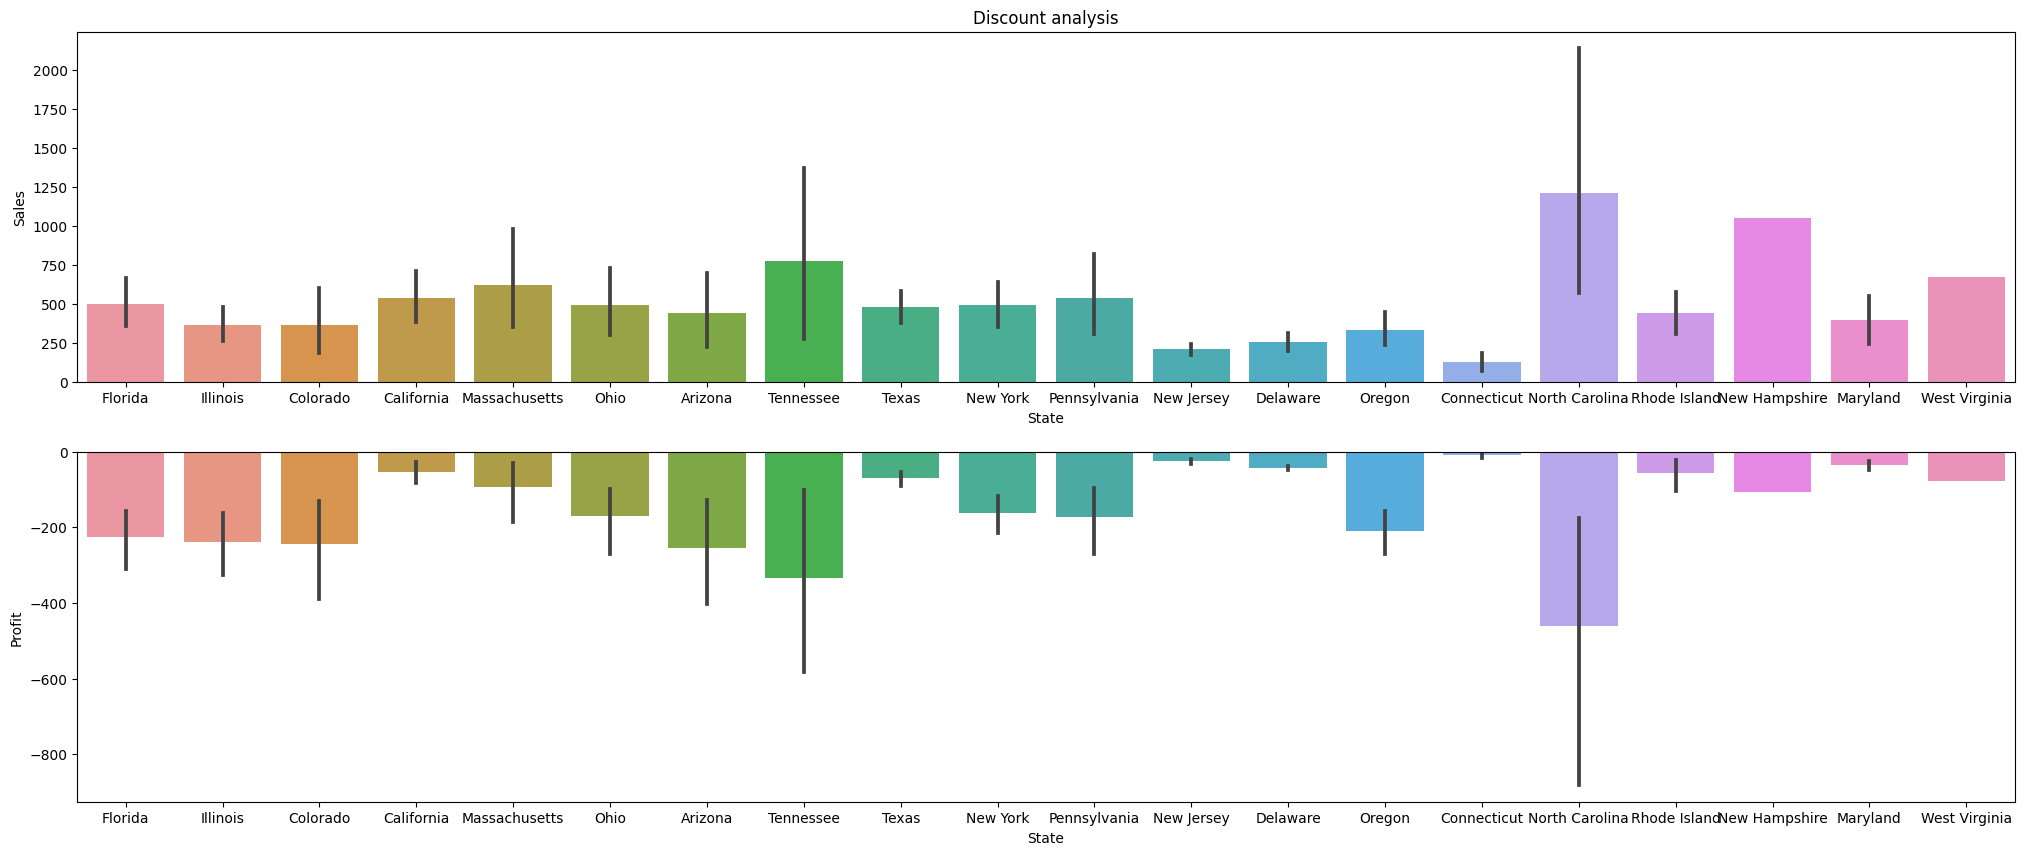

In [53]:
fig, ax = plt.subplots(2,1,figsize = (25,10))
column_name = "State"
sns.barplot(sample_data_copy.where((sample_data_copy['Sub-Category'] == 'Tables')    & (sample_data_copy['Profit']<=0) ) ,   x = column_name,y= 'Sales', ax = ax[0]).set_title('Discount analysis')
sns.barplot(sample_data_copy.where((sample_data_copy['Sub-Category'] == 'Tables')    & (sample_data_copy['Profit']<=0) ) ,   x = column_name,y= 'Profit',ax = ax[1])
plt.show()

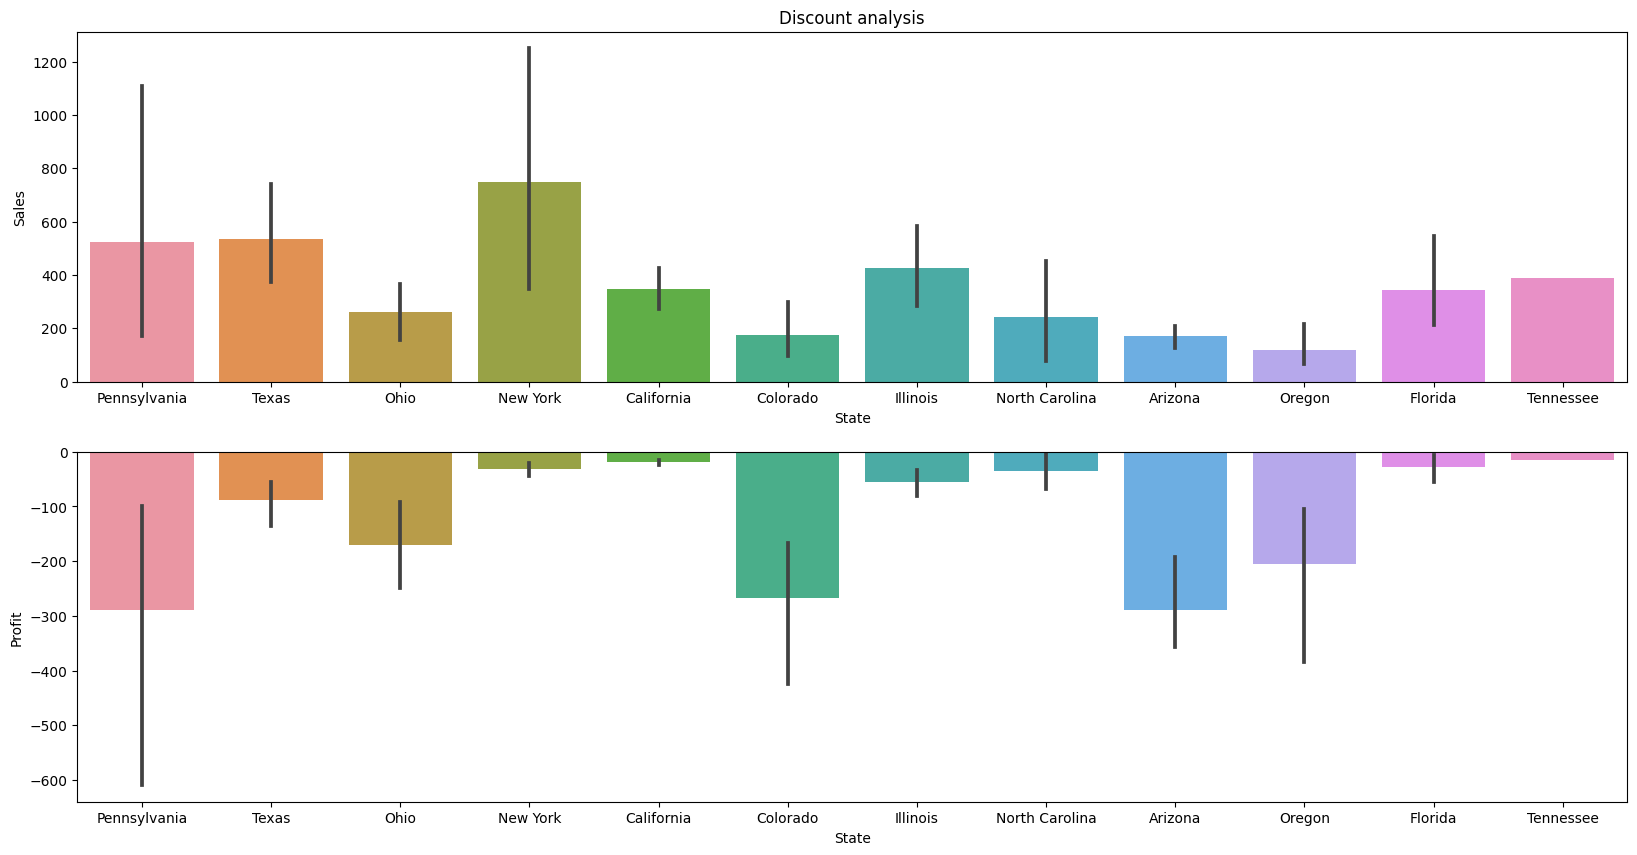

In [54]:
fig, ax = plt.subplots(2,1,figsize = (20,10))
column_name = "State"
sns.barplot(sample_data_copy.where((sample_data_copy['Sub-Category'] == 'Bookcases') & (sample_data_copy['Profit']<=0) ) ,   x = column_name,y= 'Sales', ax = ax[0]).set_title('Discount analysis')
sns.barplot(sample_data_copy.where((sample_data_copy['Sub-Category'] == 'Bookcases') & (sample_data_copy['Profit']<=0) ) ,   x = column_name,y= 'Profit',ax = ax[1])
plt.show()

# **Summary**


## **Dataset**

- This dataset has 9994 rows and 21 columns. Some column we don't need to focus on in the dataset are "Row ID", 'Order ID', "Customer ID", 'Product ID', "Postal Code", "City", "Country"
- Our business is from 2014 to 2017.
- We have 3 category which have Furniture, Office Supplies, Technology.
- Segments are Consumer, Corporate, Home  Office.
- We have 4 ship mode, such as: First Class, Second Class, Standard and Same day.
## **Data Analysis**

### **Statistic**

- From describe function, we know that:
	- We have total 9994 orders, average sales is about 229.8$, average profit is about 28.656896.
	- The max sales is about 22638$ and the min is about 0.444$
	- The max profit is about 8399.976$ and the min is about -6599.978$. That mean our business has negative profit.
	- Median of sale is 54.49
	- 75% sales is 209.94 which means we have 25% orders is greater than 209.94, but it's still less than the average of sales.
		- So less than 25% customers of the top is important for our business.
- After use linear regression, it's seem to be different about the relationship between Sales and Profit performance by year.
	- The sale is trend to downward through year
	- But the profit trend to a opposite way.
### **Dip into data analysis**
#### **Category**
- Number of office supplies is up to 60.3%. It's highest percentage but the sales is lowest (approximate 120$)
- Percentage of Technology is lowest (18.5%) but the sales and profit performance is Stable and highest
- Furniture sales performance is quite high but have small profit.
- About sub-category, highlight performance are: 'Binders', 'Chairs', 'Labels', 'Storage', 'Furnishings', 'Art', 'Phones' , 'Appliances', 'Paper', 'Accessories'
- Deep analysis into Furniture category:
	- Sales of Bookcases and Tables is quite high but in somehow, it have negative profit.
		- Bookcases -15.2305$ 
		- Tables - 55.5658$ 
	- Sales and profit of Copiers is highest. 
#### **Segment**
> We have 3 segment: Consumer (51.9%), Corporate (30.2%), Home Office(17.8%)
*From the Bar plot of sale and Profit performance,  I can have a quick conclusion that this property does not have much impact on business processes*
#### **Shipping**
- Ship Mode
	Most customers choose Standard Class(59.7%)	
	Performance of ship mode is stable between Sales and profit.
- Ship Time
	- The average shipping time is approximate 4 days.
	- The longest takes 7 days to ship and.
	- There is about 25% orders take 5-7days to ship.
#### **Discount**
Here, we can see that the amount of discount greatly affects profits.
> Discount from 0.3 to 0.8 made profit negative. If we want to get profit, we should consider about discount under 0.3=
### **Profit analysis**
> Bookcases and Tables are the most stuffs make alots negative profit
From the summary of the business process. We can find that discount policy of company will direct influence to the Profit. It's easy to see that Sales is highest if we discount 50%.
But this is also the highest level of losing profit. From 30%- 50%, we can sale more product but from 30% of our profit. We trending to get more negative profit.
- With bookcases sale in East, Central or West, although sales perform is good, profit is still less than 0. The lowest is belong to Central.
- With tables sale in South, East, Central although sales perform is good, profit is still less than 0. The lowest is belong to East.
After analyzed profit of Segment by Bookcases and Tables, I know that all the Segment type is make Tables profit negative and about Bookcases, only Consumer makes profit less than 0.

In the side of Shipping:
- All the shipping mode of Tables is less than 0 and only 'SameDay' makes profit of Bookcases positive.

According to State which has negative profit analysis, there is more state have negative profit bought Tables than Bookcases.
- The highlight is for Carolina Rhode, Tennessee, New Hampshire (Tables) 
- The highlight is for Carolina Arizona, Pennsylvania, Colorado (Bookcases)
### Conclusion 
- In some reason, Tables sales is the most stuff make business got negative profit. And it's not due to Ship mode, Region, Segment. This dataset is lacking of many another information to know the reason for this side. If we want to make it better, we should try to mark at State, Discount policy, or another side if we have more information.
- The discount policy is also a very important thing to get business's profit better. (less than 30% will get positive)
- Technology products is stable in profit and sales, so we should pay attention more 'bout this. It can be more policies to promote sales. 
